In [50]:
import random
import matplotlib.pyplot as plt
import numpy as np

In [69]:

class Matrix:
    def __init__(self, rows):
        self.data = rows  # Initialize with a list of lists
        self.flops = 0
        self.swaps = 0
        self.compare = 0
        self.cols = len(rows)
        self.rows = len(rows[0])
    def __getitem__(self, index):
        # Return the row at the given index
        return self.data[index]

    def __setitem__(self, index, value):
        # Set the row at the given index
        self.data[index] = value

    
    def __repr__(self) -> str:
        output = ''
        for row in self.data:
            output+="|"
            for elem in row:
                output+=' '+"%.4f" %elem+' '
            output+='|\n'
        return output

    def __eq__(self,other):
        for row1,row2 in zip(self,other):
            for elem1,elem2 in zip(row1,row2):
                if not elem1 == elem2:
                    return False 
        return True
    
    def eqWithTol(self,mat, rel_tol=0.05, abs_tol=1e-9):
        other = mat.data
        for row1,row2 in zip(self,other):
            for elem1,elem2 in zip(row1,row2):
                if not abs(elem1 - elem2) <= max(rel_tol * max(abs(elem1), abs(elem2)), abs_tol):
                    print(elem1,elem2)
                    return False 
        return True
    
    def rand(a=3,b=4,bounds = (0,100)):
        rows = []
        lbound,ubound = bounds
        for i in range(a):
            row = []
            for j in range(b):
                row.append(random.randint(lbound,ubound))
            rows.append(row)
        return(Matrix(rows))


    def swapItems(self,item1,item2):
        temp = self.data[item1[0]][item1[1]]
        self.data[item1[0]][item1[1]] = self.data[item2[0]][item2[1]]
        self.data[item2[0]][item2[1]] = temp
        self.swaps+=1

    def swapCols(self,index1,index2):
        for row in self.data:
            temp = row[index1]
            row[index1] = row[index2]
            row[index2] = temp
        self.swaps += len(self.data)
        

    def swapRows(self,idx1,idx2):
        temp = self.data[idx1]
        self.data[idx1] = self.data[idx2]
        self.data[idx2] = temp
        self.swaps += len(self.data[idx1])

    def mulRow(self,idx,k):
        
        self.data[idx] = [elem * k for elem in self.data[idx]]
        
        self.flops += len(self.data[idx])

    def mulSubRow(self,idx1,idx2,k):
        self.data[idx1] = [elem1-elem2 * k for elem1,elem2 in zip(self.data[idx1],self.data[idx2])]
        
        self.flops += 2*len(self.data[idx1])

    
    def divRow(self,idx,k):
        self.mulRow(idx,1/k)
    
    def mulCol(self,idx,k):
        for row in self.data:
            row[idx] *=k
        self.flops += len(self.data)

    def divCol(self,idx,k):
        self.mulCol(idx,1/k)

    def AddRow(self,idx1,idx2):
        self.data[idx1] = [a + b for a, b in zip(self.data[idx1], self.data[idx2])]
        
        self.flops += len(self.data[idx1])

    def SubRow(self,idx1,idx2):
        self.data[idx1] = [a - b for a, b in zip(self.data[idx1], self.data[idx2])]
        
        self.flops += len(self.data[idx1])

    def findNonZero(self,idx1,idx2):
        for i in range(idx1,len(self.data)):
            if self.data[i][idx2]:
                return i
        return False
    
    def gauss(self):
        for i in range(len(self.data)-1):
            for j in range(i+1,len(self.data)):
                if not self.data[i][i] == 0:    
                    self.mulSubRow(j,i,self.data[j][i]/self.data[i][i])
                else:
                    a = self.findNonZero(i,i)
                    if a:
                        print(i)
                        self.swapRows(a,i)
                        self.mulSubRow(j,i,self.data[j][i]/self.data[i][i])
                    

    def PPgauss(self):
        for i in range(len(self.data)-1):
            self.swapRows(i,self.biggestInCol(i))
            for j in range(i+1,len(self.data)):
                
                if not self.data[i][i] == 0:    
                    self.mulSubRow(j,i,self.data[j][i]/self.data[i][i])
                else:
                    a = self.findNonZero(i,i)
                    if a:
                        print(i)
                        self.swapRows(a,i)
                        self.mulSubRow(j,i,self.data[j][i]/self.data[i][i])
                        
    def ColPGauss(self):
        for i in range(len(self.data)-1):
            self.swapCols(i,self.biggestInRow(i))
            for j in range(i+1,len(self.data)):
                
                if not self.data[i][i] == 0:    
                    self.mulSubRow(j,i,self.data[j][i]/self.data[i][i])
                else:
                    a = self.findNonZero(i,i)
                    if a:
                        print(i)
                        self.swapRows(a,i)
                        self.mulSubRow(j,i,self.data[j][i]/self.data[i][i])
    
    
    def plot(self,save=False):
        matrix_np = np.array(self.data)

        plt.imshow(matrix_np, cmap='gray', interpolation='nearest')

        plt.colorbar(label='Intensity')

        plt.title('Matrix as Black-and-White Image')
        plt.xlabel('Columns')
        plt.ylabel('Rows')

        if save:
            plt.savefig(f'{save}.svg', format='svg')

        plt.show()
    
    def reverse(self):
        for i in range(len(self.data)-1,0,-1):
            
            if not self.data[i][i] == 0:
                self.divRow(i, self.data[i][i])
            else:
                a = self.findNonZero(i,i)
                if a:
                    print(i)
                    self.swapRows(a,i)
                    self.mulSubRow(j,i,self.data[j][i]/self.data[i][i])
                else:
                    continue
            for j in range(i,0,-1):
                # self.mulRow(j-1, self.data[i][i]/self.data[j-1][i])
                # self.SubRow(j-1,i)
                
                self.mulSubRow(j-1,i,self.data[j-1][i]/self.data[i][i])
                
        self.divRow(0, self.data[0][0])
        
    def biggestInRow(self,idx):
        self.compare+= len(self.data[idx])
        return self.data[idx].index(max(self.data[idx]))
    def biggestInCol(self,idx):
        max_value = 0
        max_index = -1
        for i, row in enumerate(self.data[idx:]):
            if abs(row[idx]) > max_value:
                max_value = abs(row[idx])
                max_index = i+idx
        self.compare+= len(self.data)
        return max_index
    def complexity(self):
        print(f"flops:{self.flops}, comparisons:{self.compare}, swaps:{self.swaps}")


In [52]:
matrix1 = Matrix([
    [0,4,8,7,9],
    [0, 4, 8,7,9],
    [13,3000,7,9,24],
    [13,30654,7,95,124]
])
#print(matrix1)
matrix1.complexity()
matrix1.gauss()
#print(matrix1)
matrix1.complexity()
matrix1.reverse()
print(matrix1)
matrix1.complexity()

matrix2 = Matrix([
    [0,4,8,7,9],
    [0, 4, 8,7,9],
    [13,3000,7,9,24],
    [13,30654,7,95,124]
])
#print(matrix2)
matrix2.complexity()
matrix2.PPgauss()
#print(matrix2)
matrix2.complexity()
matrix2.reverse()
print(matrix2)
matrix2.complexity()

print(matrix1==matrix2)
print(matrix1.eqWithTol(matrix2,0.001))

flops:0, comparisons:0, swaps:0
0
2
flops:60, comparisons:0, swaps:10
| 1.0000  0.0000  0.0000  -0.4957  0.4069 |
| 0.0000  1.0000  0.0000  0.0031  0.0036 |
| -0.0000  -0.0000  1.0000  0.8734  1.1232 |
| 0.0000  0.0000  0.0000  0.0000  0.0000 |

flops:105, comparisons:0, swaps:10
flops:0, comparisons:0, swaps:0
flops:60, comparisons:12, swaps:15
| 1.0000  0.0000  0.0000  -0.4957  0.4069 |
| 0.0000  1.0000  0.0000  0.0031  0.0036 |
| 0.0000  0.0000  1.0000  0.8734  1.1232 |
| 0.0000  0.0000  0.0000  0.0000  0.0000 |

flops:105, comparisons:12, swaps:15
False
True


In [79]:
import copy
# errors = 0
# eq = 0
# for i in range(1):
#     try:
a=Matrix.rand(100,101,(0,1))
b = Matrix(copy.deepcopy(a.data))
c = Matrix(copy.deepcopy(a.data))
a.gauss()
b.PPgauss()
c.ColPGauss()
a.reverse()
b.reverse()
c.reverse()
#         if a.eqWithTol(b,0.001):
#             eq+=1
# #     except:
#         errors+=1
# print(f"errors:{errors} equalities:{eq}")

3
6
7


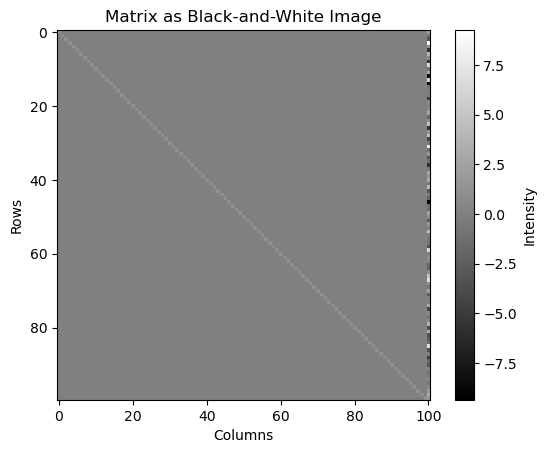

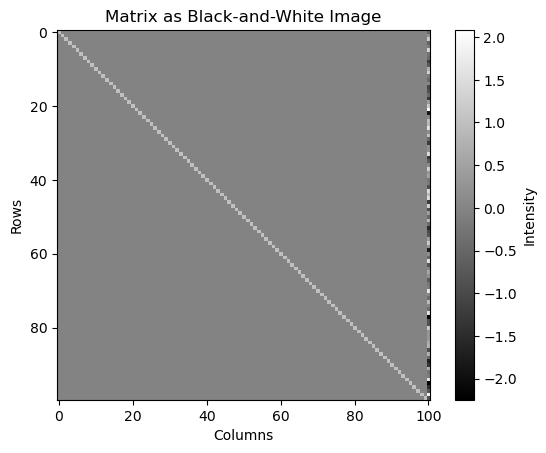

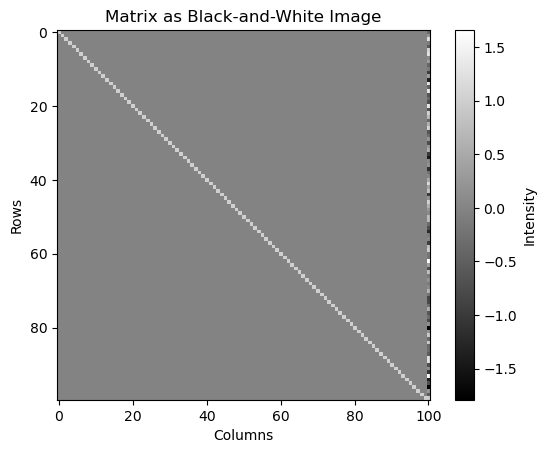

In [80]:
#անհայտների քանակ > հավասարումների քանակ
a.plot()

b.plot()

c.plot()